In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)  #sets the default size of figures in matplotlib,

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.shape

(13320, 9)

In [6]:
df.shape

(13320, 9)

In [7]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.shape

(13320, 5)

In [8]:
df1.shape

(13320, 5)

In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df1 = df1.dropna()

In [11]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df1.shape

(13246, 6)

In [17]:
def chk_float(x):
    try:
        float(x)
    except:
        return False

    return True

In [18]:
df1[~df1['total_sqft'].apply(chk_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def sqft_range_to_num(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return False
        

In [20]:
sqft_range_to_num('2100 - 2850')

2475.0

In [21]:
df2 = df1.copy()

In [22]:
df2['total_sqft'] = df2['total_sqft'].apply(sqft_range_to_num)

In [23]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [25]:
df3 = df2.drop(['size'],axis='columns')

In [26]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [27]:
# df3['price/sqft'] = df3['price']*100000/df3['total_sqft']
# df3.head()

# Check for zero values in 'total_sqft' column
zero_sqft_mask = df3['total_sqft'] == 0

# Replace zero values with NaN (or any other value you prefer)
df3['total_sqft'].replace(0, np.nan, inplace=True)

# Perform division only for non-zero values
df3.loc[~zero_sqft_mask, 'price/sqft'] = df3['price'] * 100000 / df3['total_sqft']

df3.head()


,location,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [28]:
len(df3.location.unique())

1304

In [29]:
df3.location = df3.location.apply(lambda x: x.strip())

In [30]:
loc_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
len(loc_stats[loc_stats<=7])

984

In [32]:
loc_stats_lessthan_7 = loc_stats[loc_stats<=7]
loc_stats_lessthan_7

location
Hessarghatta             7
Jayanagar                7
Jeevan bima nagar        7
HOSUR MAIN ROAD          7
Defence Colony           7
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 984, dtype: int64

In [33]:
df3.location = df3.location.apply(lambda x: 'other' if x in loc_stats_lessthan_7 else x)
len(df3.location.unique())

310

In [34]:
df3.shape

(13246, 6)

In [35]:
df4 = df3[~(df3['total_sqft']/df3['bhk']<300)]
df4.shape

(12502, 6)

In [36]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price/sqft'])
        stde = np.std(subdf['price/sqft'])
        reduced_df = subdf[(subdf['price/sqft']>m-stde) & (subdf['price/sqft']<=m+stde)]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

In [37]:
df5 = remove_outlier(df4)
df5.shape

(10143, 6)

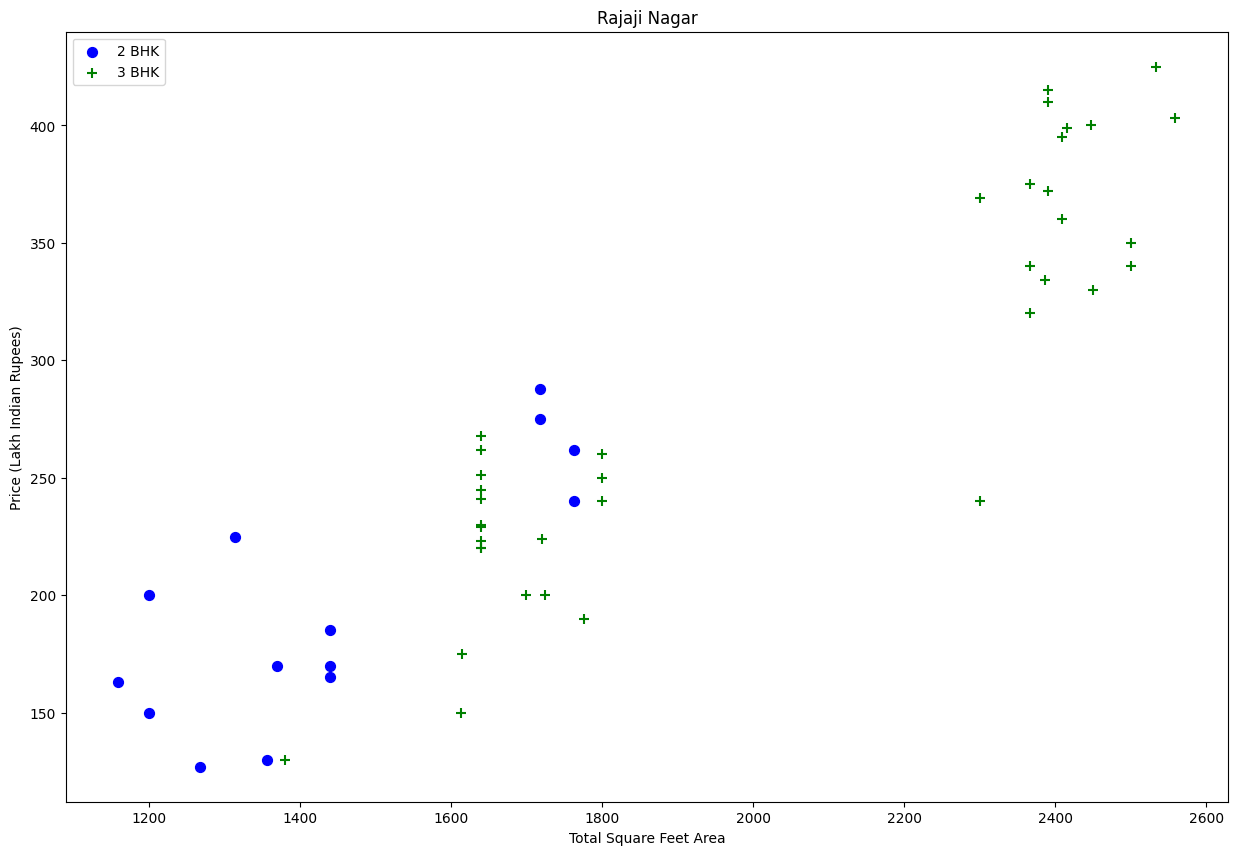

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

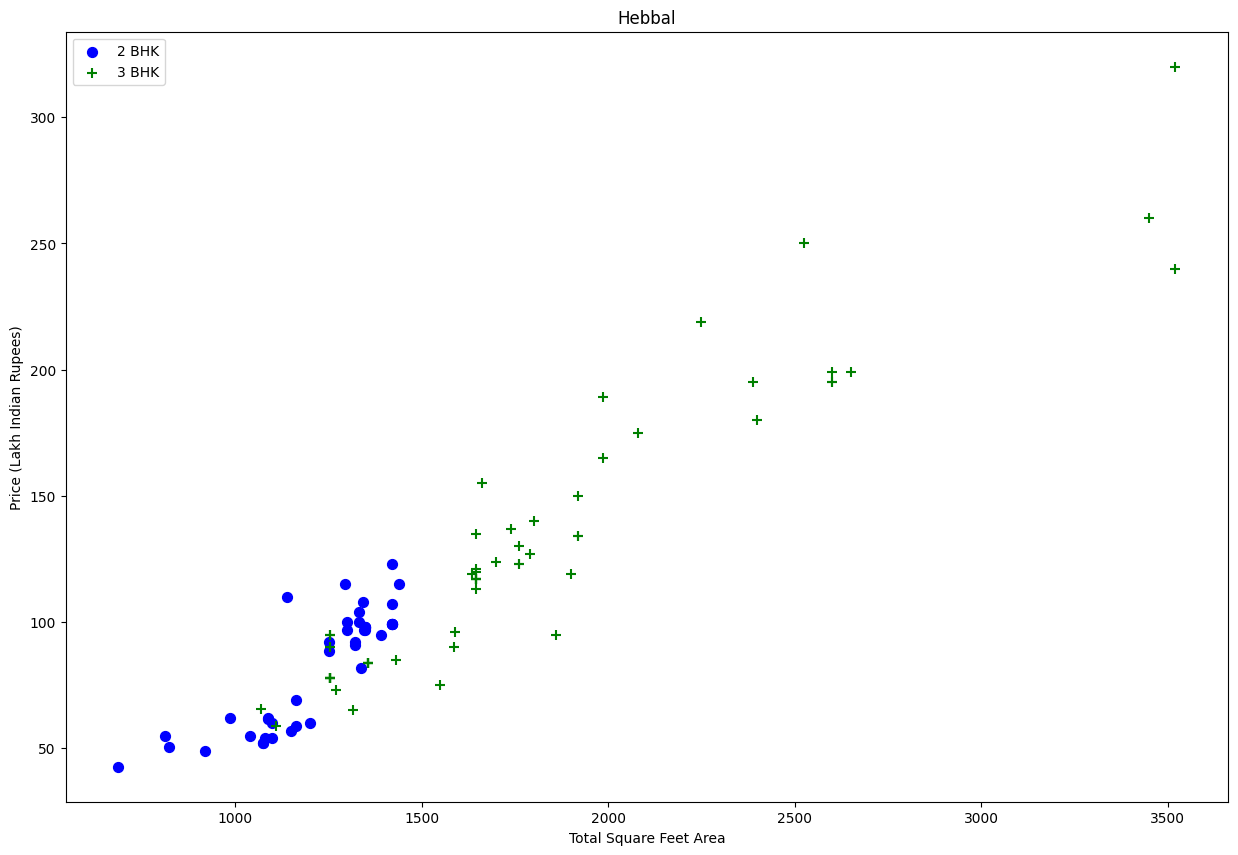

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Hebbal")

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price/sqft']),
                'std': np.std(bhk_df['price/sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7485, 6)

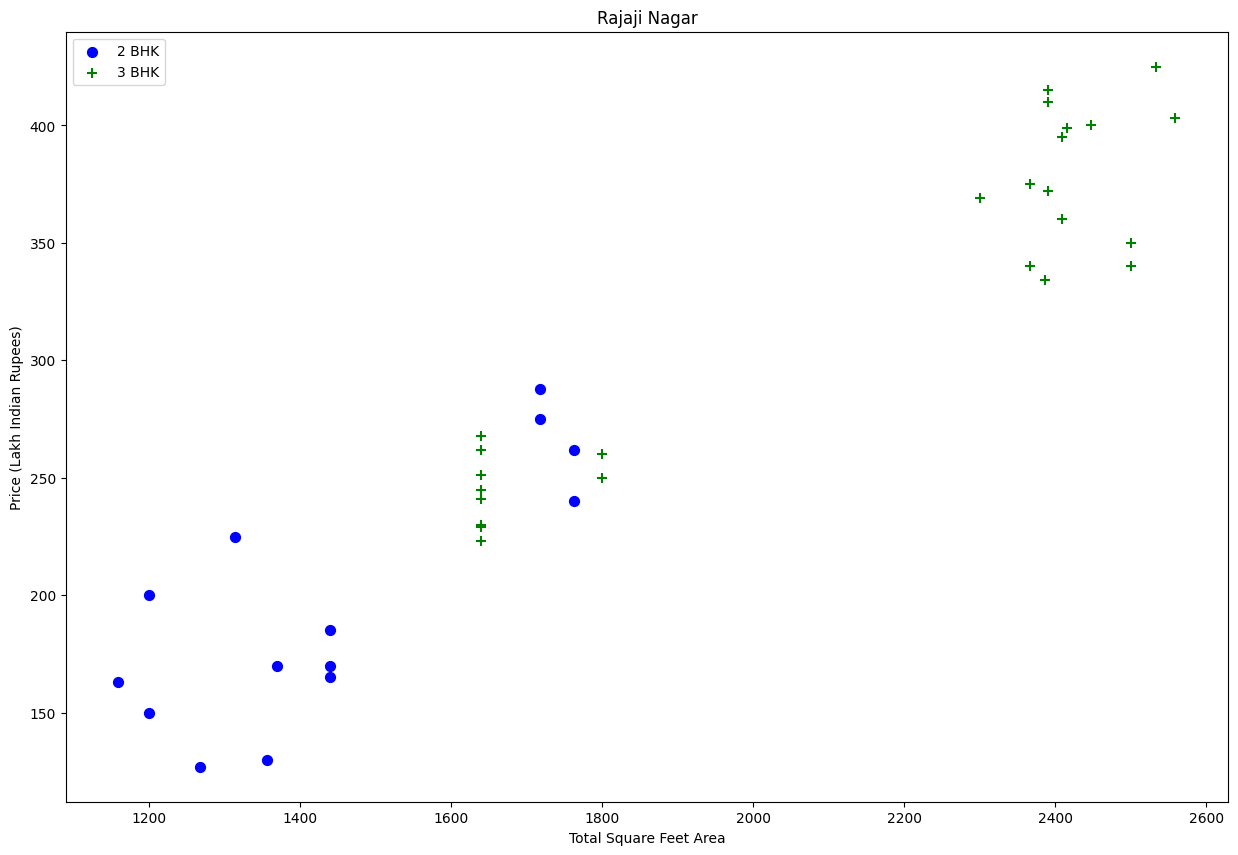

In [41]:
plot_scatter_chart(df6,"Rajaji Nagar")

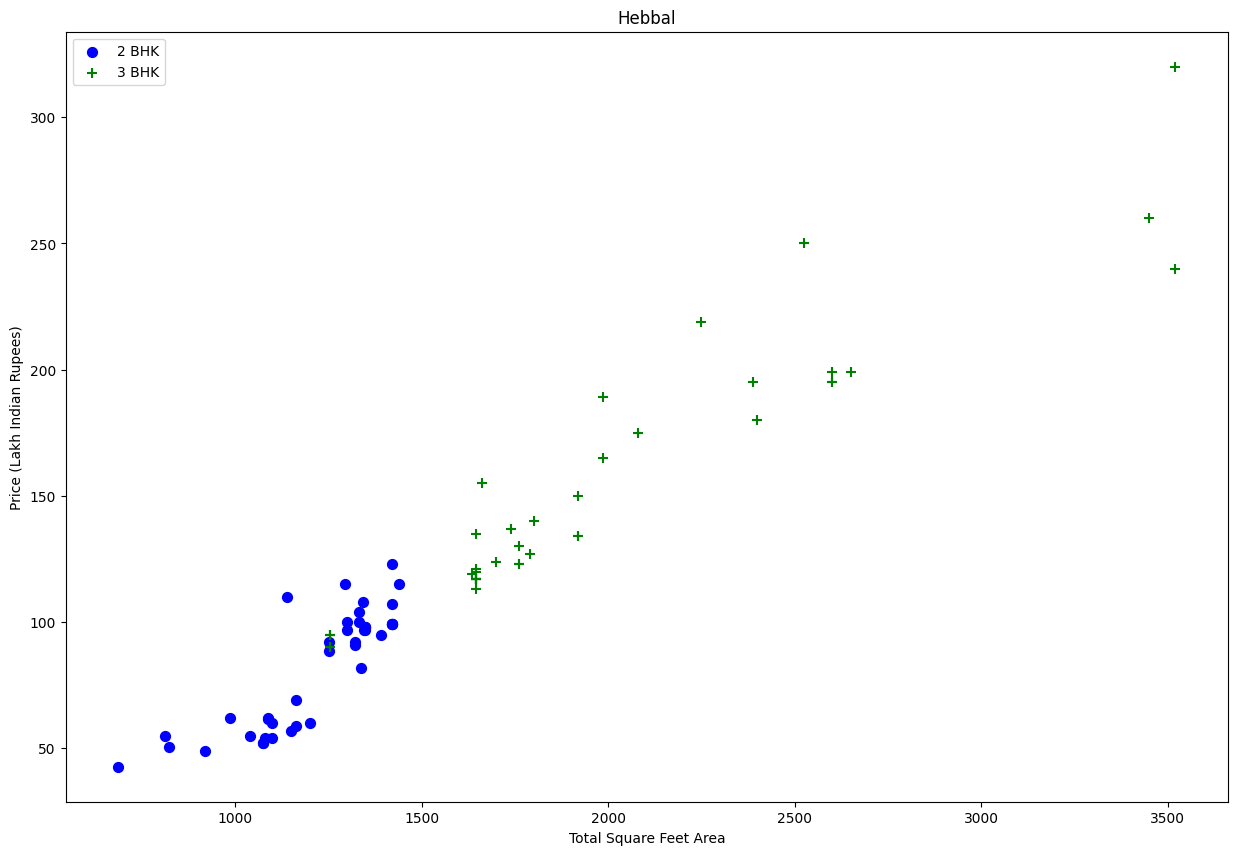

In [42]:
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'Count')

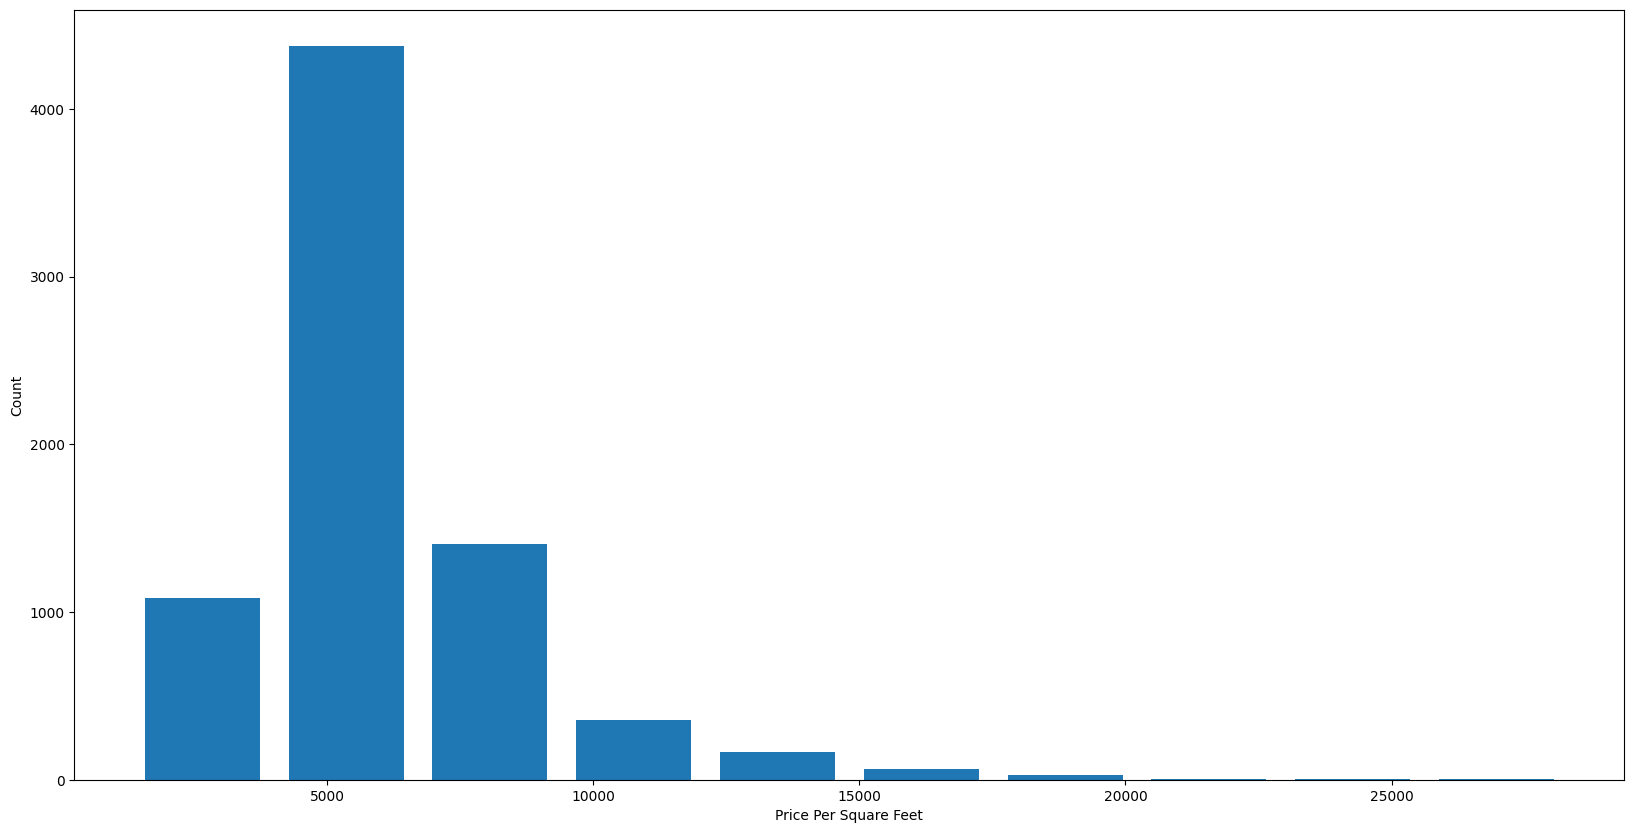

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6['price/sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
df6.bath.unique()

array([ 3.,  2.,  4.,  5.,  1.,  8.,  9.,  6., 14.,  7., 12., 16., 13.])

Text(0, 0.5, 'Count')

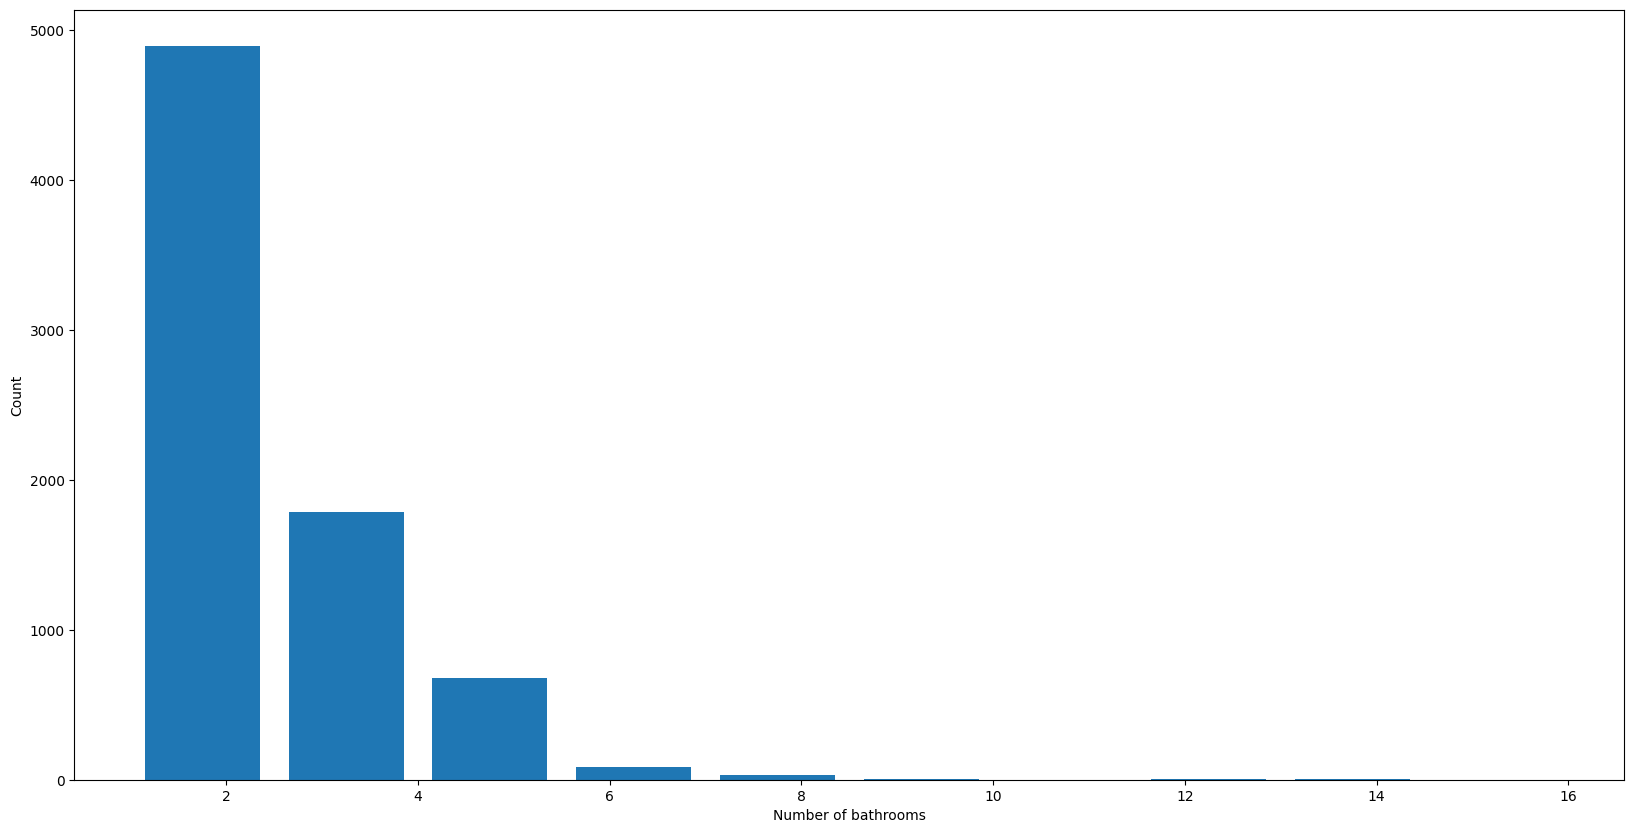

In [45]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [46]:
df6[df6.bath>10]

,location,total_sqft,bath,price,bhk,price/sqft
617,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5531,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8747,other,12000.0,12.0,525.0,10,4375.000000
8821,other,10000.0,16.0,550.0,16,5500.000000
9401,other,6000.0,12.0,150.0,11,2500.000000
9660,other,5425.0,13.0,275.0,13,5069.124424


In [47]:
df6[df6.bath>df6.bhk+2]

,location,total_sqft,bath,price,bhk,price/sqft
617,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1705,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5486,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6653,Sathya Sai Layout,11338.0,9.0,1000.0,6,8819.897689
7047,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [48]:
df7 = df6[df6.bath<df6.bhk+2]

In [49]:
df7.shape

(7406, 6)

In [50]:
df7.head()

,location,total_sqft,bath,price,bhk,price/sqft
0,1st Block HRBR Layout,2300.0,3.0,80.0,3,3478.260870
1,1st Block HRBR Layout,1250.0,2.0,67.0,2,5360.000000
2,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
3,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
4,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333


In [51]:
df8 = df7.drop(['price/sqft'],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block HRBR Layout,2300.0,3.0,80.0,3
1,1st Block HRBR Layout,1250.0,2.0,67.0,2
2,1st Block Jayanagar,2850.0,4.0,428.0,4
3,1st Block Jayanagar,1630.0,3.0,194.0,3
4,1st Block Jayanagar,1875.0,2.0,235.0,3


In [52]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,4th Block Koramangala,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other
0,1st Block HRBR Layout,2300.0,3.0,80.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block HRBR Layout,1250.0,2.0,67.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,2850.0,4.0,428.0,4,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1630.0,3.0,194.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1875.0,2.0,235.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df10 = df9.drop(['location','other'],axis='columns')
df10.head()

,total_sqft,bath,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2300.0,3.0,80.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,67.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2850.0,4.0,428.0,4,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1630.0,3.0,194.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1875.0,2.0,235.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df10.shape

(7406, 313)

In [56]:
X = df10.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2300.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2850.0,4.0,4,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1630.0,3.0,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1875.0,2.0,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
y = df10.price
y.head()

0     80.0
1     67.0
2    428.0
3    194.0
4    235.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8920044539410563

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=20)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90100409, 0.87978742, 0.88192125, 0.85204723, 0.78208693])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=20)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,0.859369,{'fit_intercept': True}
1,lasso,0.702821,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.775029,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [69]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [70]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.68612498717395

In [71]:
predict_price('1st Phase JP Nagar',1000,3, 2)

C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.54967792710563

In [72]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.43489984798957

In [73]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.30875827763748

In [75]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [76]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))